In [1]:
import torch
from torch import nn, optim
from torchsummary import summary
import torchvision
import numpy as np
import torchvision.transforms as T
import matplotlib.pyplot as plt
import os
from torch.utils.tensorboard import SummaryWriter
from torch.utils import tensorboard
from torchvision.models import resnet18
import zipfile
import glob
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import random

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
torch.cuda.empty_cache()

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: {}".format(device))

Device: cuda:0


In [4]:
print(torch.cuda.device_count())

1


In [5]:
augs = T.Compose([
    T.RandomRotation(degrees = 20),
    T.Resize((224,224)),
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])

test_augs=  T.Compose([
    T.Resize((224,224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])

In [6]:
img_files = os.listdir('data/train/train')

def train_path(p):
    return f"data/train/train/{p}"

img_files = list(map(train_path, img_files))
random.shuffle(img_files)

train = img_files[:20000]
val = img_files[20000:]

for i in range(100):
    print(train[i])

class CatDogDataset(Dataset):
    def __init__(self, image_paths, transform):
        super().__init__()
        self.paths = image_paths
        self.len = len(self.paths)
        self.transform = transform

    def __len__(self):
        return self.len

    def __getitem__(self, index):
        path = self.paths[index]
        image = Image.open(path).convert('RGB')
        image = self.transform(image)
        label = 0 if 'cat' in path else 1
        return (image, label)

data/train/train/dog.3819.jpg
data/train/train/cat.11437.jpg
data/train/train/cat.10079.jpg
data/train/train/dog.8509.jpg
data/train/train/dog.6915.jpg
data/train/train/dog.4321.jpg
data/train/train/cat.4376.jpg
data/train/train/dog.11482.jpg
data/train/train/cat.5354.jpg
data/train/train/cat.5577.jpg
data/train/train/dog.8498.jpg
data/train/train/cat.6004.jpg
data/train/train/dog.1572.jpg
data/train/train/dog.6848.jpg
data/train/train/cat.6231.jpg
data/train/train/dog.393.jpg
data/train/train/cat.3648.jpg
data/train/train/cat.1728.jpg
data/train/train/dog.5844.jpg
data/train/train/dog.3371.jpg
data/train/train/cat.5328.jpg
data/train/train/dog.9780.jpg
data/train/train/dog.415.jpg
data/train/train/dog.1471.jpg
data/train/train/dog.5138.jpg
data/train/train/cat.6902.jpg
data/train/train/cat.3316.jpg
data/train/train/dog.1396.jpg
data/train/train/cat.5135.jpg
data/train/train/cat.740.jpg
data/train/train/dog.3417.jpg
data/train/train/cat.8594.jpg
data/train/train/cat.11105.jpg
data/trai

In [7]:
train_data = CatDogDataset(train, augs)
val_data = CatDogDataset(val, test_augs)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle = True)

tensor(1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

tensor(1)
tensor(1)
tensor(0)
tensor(1)
tensor(0)
tensor(0)
tensor(1)
tensor(0)
tensor(0)


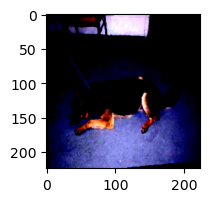

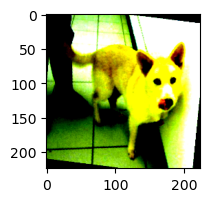

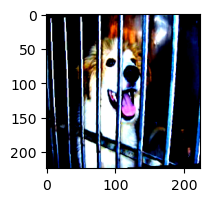

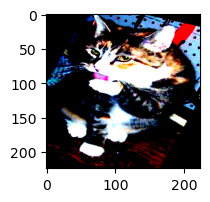

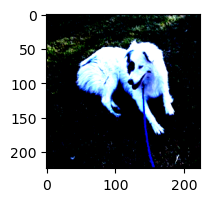

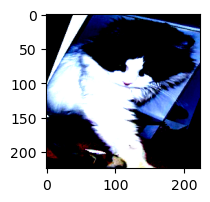

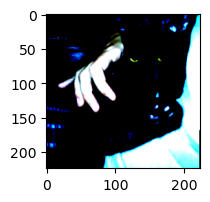

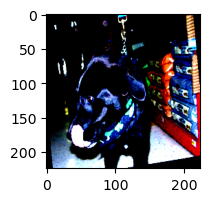

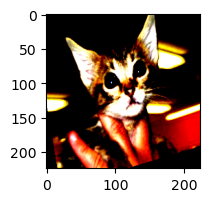

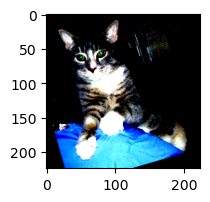

In [8]:
def imshow(img):
    plt.figure(figsize=(2,2))
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))

dataiter = iter(train_loader)
images, labels = next(dataiter)

for i in range(10):
    print(labels[i])
    imshow(torchvision.utils.make_grid(images[i]))

In [9]:
def MobileNet(num_classes=2):
    model = torchvision.models.mobilenet_v2(pretrained = False)
    model.fc = nn.Sequential(
        nn.LazyLinear(num_classes),
        nn.Softmax(-1)
    )
    return model
model = MobileNet()
model.to(device)
summary(model, (3,224,224))

C:\Users\duyan\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\duyan\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\duyan\anaconda3\Lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
             ReLU6-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
             ReLU6-6         [-1, 32, 112, 112]               0
            Conv2d-7         [-1, 16, 112, 112]             512
       BatchNorm2d-8         [-1, 16, 112, 112]              32
  InvertedResidual-9         [-1, 16, 112, 112]               0
           Conv2d-10         [-1, 96, 112, 112]           1,536
      BatchNorm2d-11         [-1, 96, 112, 112]             192
            ReLU6-12         [-1, 96, 112, 112]               0
           Conv2d-13           [-1, 96, 56, 56]             864
      BatchNorm2d-14           [-1, 96,

In [10]:
optimizer = optim.SGD(model.parameters(), momentum = 0.9, lr = 0.01, weight_decay=1e-5)
loss_func = nn.CrossEntropyLoss(reduction = 'mean')
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience = 4,verbose = True, min_lr = 0.00001)
num_epochs = 20

In [11]:
train_acc_list = []
val_acc_list = []

train_loss_list = []
val_loss_list = []

es_count = 0 # Patience for LR scheduler
curr_epoch = 0
curr_loss = 0
best_test_acc = 0
best_epoch = 0

for epoch in range(num_epochs):
    curr_epoch = epoch
    if es_count == 15:
        print("Stop training")
        break
    model.train()
    train_loss = 0
    train_acc = 0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_func(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        accuracy = (torch.max(outputs, dim=-1, keepdim=True)[1].flatten() == labels).sum() / len(labels)
        train_acc += accuracy.item()

    train_acc /= len(train_loader)
    train_loss /= len(train_loader)
    train_acc_list.append(train_acc)
    train_loss_list.append(train_loss)

    model.eval()

    val_acc = 0
    val_loss = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = loss_func(outputs, labels)
            val_loss += loss.item()
            accuracy = (torch.max(outputs, dim=-1, keepdim=True)[1].flatten() == labels).sum() / len(labels)
            val_acc += accuracy.item()

        val_acc /= len(val_loader)
        val_loss /= len(val_loader)
        val_acc_list.append(val_acc)
        val_loss_list.append(val_loss)

        if val_acc > best_test_acc:
            best_epoch = epoch
            best_test_acc = val_acc
            torch.save(model.state_dict(), "best_mobilenet.pth")

    scheduler.step(val_loss)

    if abs(val_loss - curr_loss) < 0.005 or val_loss > curr_loss:
        es_count += 1
        curr_loss = val_loss
    else:
        es_count = 0
        curr_loss = val_loss

    print(f"Epoch {epoch + 1}/{num_epochs} - Training Acc: {train_acc:.4f} - Validation Acc: {val_acc:.4f}")


Epoch 1/20 - Training Acc: 0.5635 - Validation Acc: 0.6252
Epoch 2/20 - Training Acc: 0.6818 - Validation Acc: 0.7331
Epoch 3/20 - Training Acc: 0.7345 - Validation Acc: 0.7836
Epoch 4/20 - Training Acc: 0.7867 - Validation Acc: 0.8340
Epoch 5/20 - Training Acc: 0.8227 - Validation Acc: 0.8372
Epoch 6/20 - Training Acc: 0.8545 - Validation Acc: 0.8802
Epoch 7/20 - Training Acc: 0.8713 - Validation Acc: 0.8991
Epoch 8/20 - Training Acc: 0.8891 - Validation Acc: 0.8848
Epoch 9/20 - Training Acc: 0.9008 - Validation Acc: 0.8893
Epoch 10/20 - Training Acc: 0.9084 - Validation Acc: 0.9172
Epoch 11/20 - Training Acc: 0.9164 - Validation Acc: 0.9256
Epoch 12/20 - Training Acc: 0.9229 - Validation Acc: 0.9260
Epoch 13/20 - Training Acc: 0.9298 - Validation Acc: 0.9291
Epoch 14/20 - Training Acc: 0.9335 - Validation Acc: 0.9285
Epoch 15/20 - Training Acc: 0.9357 - Validation Acc: 0.9295
Epoch 16/20 - Training Acc: 0.9413 - Validation Acc: 0.9325
Epoch 17/20 - Training Acc: 0.9459 - Validation A

In [12]:

train_loss_list = np.array(train_loss_list)
val_loss_list = np.array(val_loss_list)
train_acc_list = np.array(train_acc_list)
val_acc_list = np.array(val_acc_list)

writer = SummaryWriter()

writer.flush()
for i in range(curr_epoch):
    writer.add_scalars('Loss', {'Train': train_loss_list[i], 'Test': val_loss_list[i]}, i)
    writer.add_scalars('Accuracy', {'Train': train_acc_list[i], 'Test': val_acc_list[i]}, i)

writer.close()
